### ANALISYS OF DYNAMIC SIGNS


#### Here we need to visualize the siize of our data, because we need apply padding to set all the number of frames to one max value

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [287]:
base_path = '..\\..\data\\dataset\\DINAMICAS\\' ###* Path to the folder of the dataset
letters = os.listdir(base_path) ###* List of the letters to write in hdf5
letters

['HOLA', 'J', 'K', 'NN', 'X', 'Z']

In [288]:
signs = {}
for letter in letters:
    letter_path = os.path.join(base_path, f'{letter}') ###* Path to the folder of the letter
    csv_files = [f for f in os.listdir(letter_path) if f.endswith('.csv')] ###* List of the csv files in the folder
    signs[letter] = csv_files


In [289]:
list(signs.keys())

['HOLA', 'J', 'K', 'NN', 'X', 'Z']

In [290]:
for sign in list(signs.keys()):
    print(f'{sign} has {len(signs[sign])} samples')


HOLA has 200 samples
J has 200 samples
K has 200 samples
NN has 201 samples
X has 170 samples
Z has 199 samples


##### Parameters of our dataset

In [291]:
# Initial parameters
n_points = 21  # landmarks per frame
# n_frames = len(df['cx']) // n_points  # number of frames
t_total = 2 # total time for sign

In [292]:

import pandas as pd

output = {}
sequence_signs = {}
for name_sign, sign in signs.items():
    list_of_frames = []
    list_of_secuences = []
    # print(name_sign)
    # print(sign)
    for samples in sign:
        file_path = os.path.join(base_path, f'{name_sign}\\{samples}')
        try:
            df = pd.read_csv(file_path)
            if df.empty:
                print(f"Skipping empty file: {file_path}")
                continue
            df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
            n_frames = int(len(df['cx']) / n_points)
            list_of_frames.append(n_frames)
            list_of_secuences.append(df)
        except pd.errors.EmptyDataError:
            print(f"Skipping empty file: {file_path}")
            continue
    output[name_sign] = list_of_frames
    sequence_signs[name_sign] = list_of_secuences    
print(sequence_signs.keys())
print(sequence_signs['HOLA'][0].head())

Skipping empty file: ..\..\data\dataset\DINAMICAS\Z\Z154.csv
dict_keys(['HOLA', 'J', 'K', 'NN', 'X', 'Z'])
    cx  cxROI   cy  cyROI
0  526    152  447    212
1  571    165  426    202
2  610    176  380    181
3  647    187  350    166
4  682    197  336    160


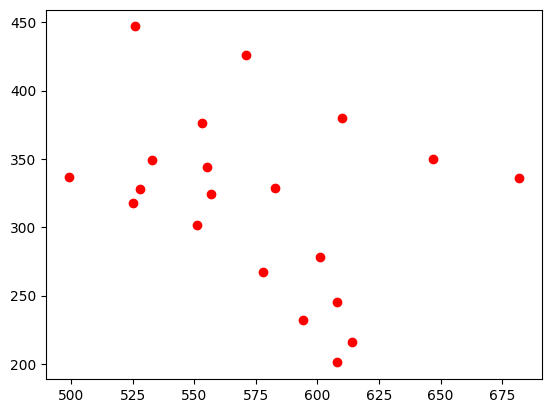

In [293]:
plt.plot(sequence_signs['HOLA'][0]['cx'][0:20], secuence_signs['HOLA'][0]['cy'][0:20], 'ro')

In [294]:
for name_sign, sign in output.items():
    print(f'{name_sign} has {round(np.array(sign).mean())} frames on average')
    print(f'{name_sign} has {round(np.array(sign).max())} frames on max')
    print(f'{name_sign} has {round(np.array(sign).min())} frames on min')
    print('----'*30)


HOLA has 74 frames on average
HOLA has 197 frames on max
HOLA has 38 frames on min
------------------------------------------------------------------------------------------------------------------------
J has 79 frames on average
J has 241 frames on max
J has 44 frames on min
------------------------------------------------------------------------------------------------------------------------
K has 73 frames on average
K has 257 frames on max
K has 1 frames on min
------------------------------------------------------------------------------------------------------------------------
NN has 76 frames on average
NN has 207 frames on max
NN has 24 frames on min
------------------------------------------------------------------------------------------------------------------------
X has 75 frames on average
X has 168 frames on max
X has 25 frames on min
------------------------------------------------------------------------------------------------------------------------
Z has 72 frame

rows: 3, cols: 2


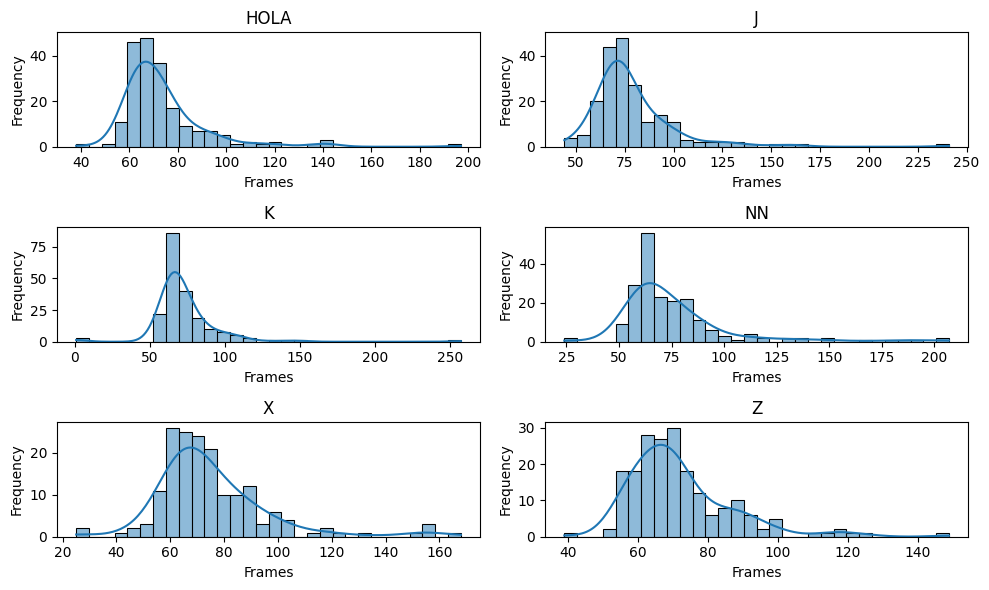

In [295]:
# !pip install seaborn
import seaborn as sns
n_rows = len(output.keys())//2
n_cols = len(output.keys())// n_rows
if n_rows * n_cols < len(output.keys()):
    n_cols += 1
print(f'rows: {n_rows}, cols: {n_cols}')

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()
for idx, (name_sign, sign) in enumerate(output.items()):
    ax = axes[idx]
    sns.histplot(sign, bins=30, kde=True, ax=ax)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name_sign}')

plt.tight_layout()
plt.show()

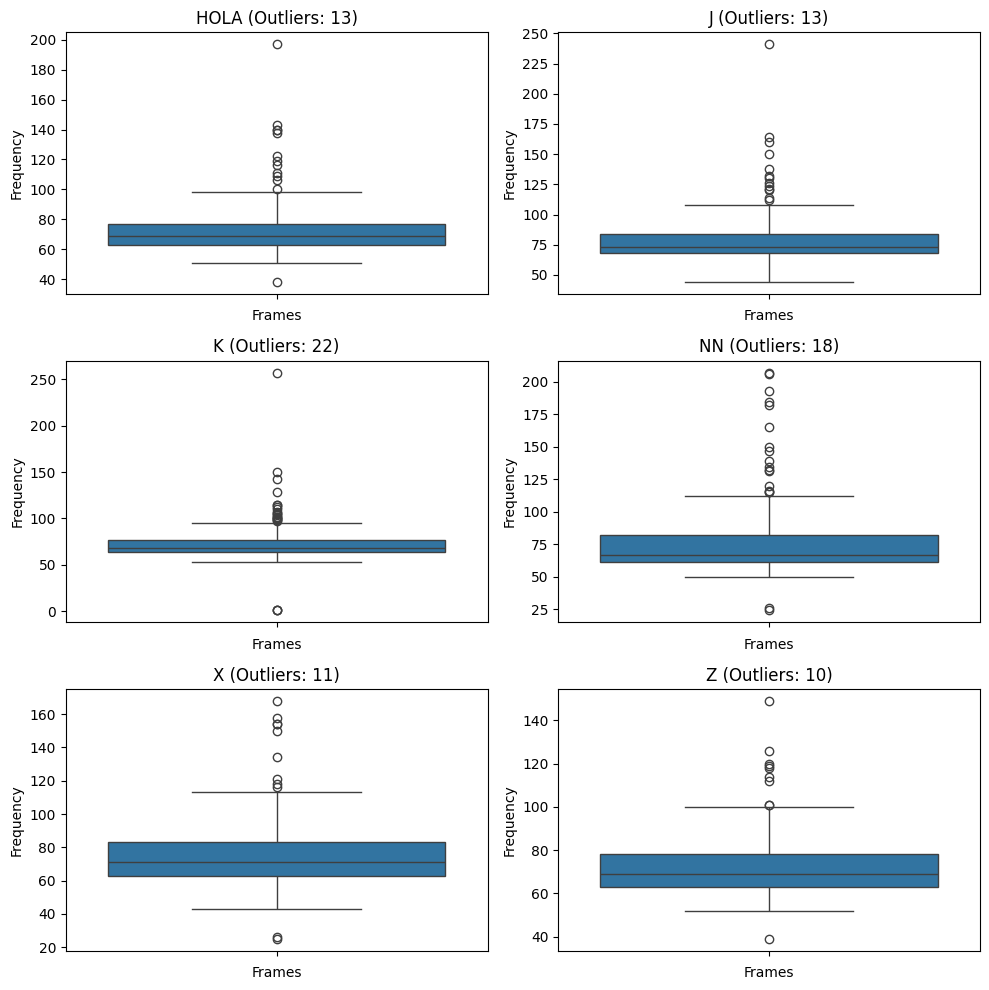

Outliers for sign:
HOLA: 13
J: 13
K: 22
NN: 18
X: 11
Z: 10
Outliers positions for sign:
HOLA: [  0   8  22  59  85 100 114 153 159 160 167 171 182]
J: [  0   4  34  64 111 114 126 144 145 154 156 167 190]
K: [  0   3  25  73  74  75 100 103 111 125 145 161 164 172 174 176 177 179
 184 192 193 196]
NN: [  0  14 100 111 117 122 123 126 136 139 140 159 160 164 184 187 188 189]
X: [  9  69  78  80  82  93 109 115 122 133 137]
Z: [ 37  54  61  88 112 142 164 166 167 168]


In [296]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
axes = axes.flatten()

outliers_count = {}
outliers_pos = {}

for idx, (name_sign, sign) in enumerate(output.items()):
    ax = axes[idx]
    #  calculate IQR
    Q1 = np.percentile(sign, 25)
    Q3 = np.percentile(sign, 75)
    IQR = Q3 - Q1
    
    # calculate the outlier limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers = ((sign < lower_bound) | (sign > upper_bound)).sum()
    pos = np.where((sign < lower_bound) | (sign > upper_bound))
    pos = pos[0]
    outliers_pos[name_sign] = pos
    outliers_count[name_sign] = outliers
    
    # Draw the boxplot
    sns.boxplot(sign, ax=ax)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name_sign} (Outliers: {outliers})')

plt.tight_layout()
plt.show()

# 
print("Outliers for sign:")
for name, count in outliers_count.items():
    print(f"{name}: {count}")
    
print("Outliers positions for sign:")
for name, pos in outliers_pos.items():
    print(f"{name}: {pos}")


#### Now we have data that are outliers we need to drop it

In [297]:
sequence_signs_clean = sequence_signs.copy()
for name, pos in outliers_pos.items():
    print('Total data',len(sequence_signs_clean[name]))
    sequence_signs_clean[name] = [sequence_signs_clean[name][i] for i in range(len(sequence_signs_clean[name])) if i not in pos]
    
    

Total data 200
Total data 200
Total data 200
Total data 201
Total data 170
Total data 198


In [298]:
output_clean = {}
for name_sign,sign in sequence_signs_clean.items():
    list_of_frames = []
    for samples in sign:
        n_frames = int(len(samples['cx']) / n_points)
        list_of_frames.append(n_frames)
    output_clean[name_sign] = list_of_frames   

rows: 3, cols: 2


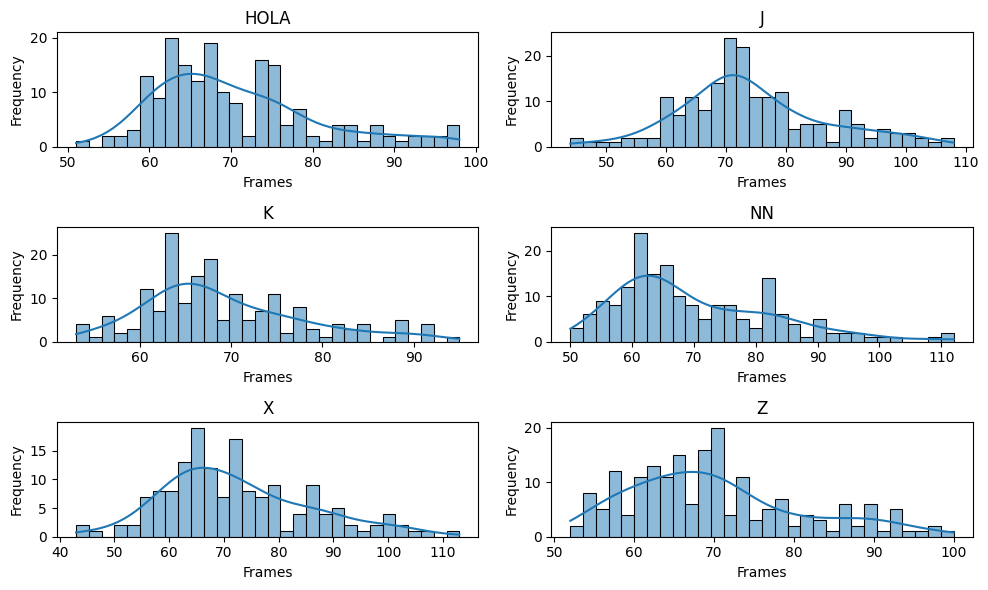

In [299]:
# !pip install seaborn
import seaborn as sns
n_rows = len(output.keys())//2
n_cols = len(output.keys())// n_rows
if n_rows * n_cols < len(output.keys()):
    n_cols += 1
print(f'rows: {n_rows}, cols: {n_cols}')

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))
axes = axes.flatten()
for idx, (name_sign, sign) in enumerate(output_clean.items()):
    ax = axes[idx]
    sns.histplot(sign, bins=30, kde=True, ax=ax)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name_sign}')

plt.tight_layout()
plt.show()

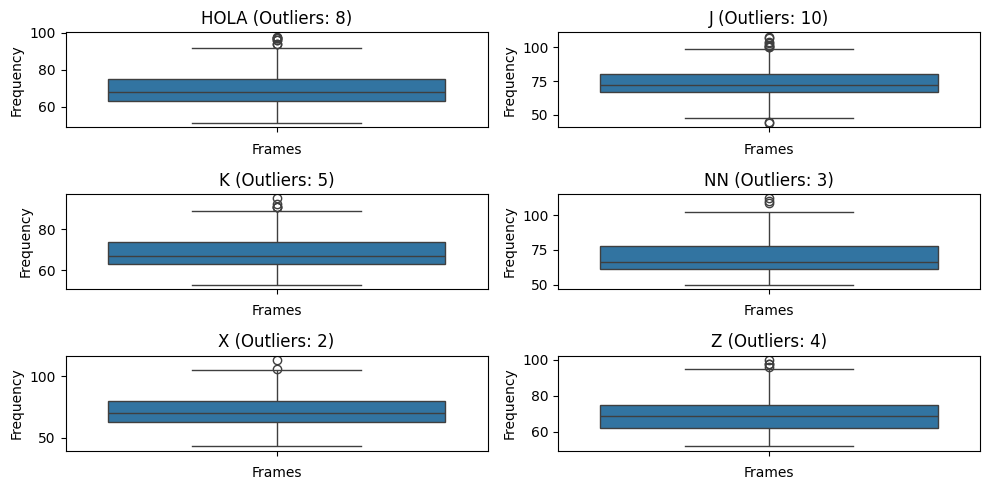

In [300]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5))
axes = axes.flatten()

for idx, (name_sign, sign) in enumerate(output_clean.items()):
    ax = axes[idx]
    #  calculate IQR
    Q1 = np.percentile(sign, 25)
    Q3 = np.percentile(sign, 75)
    IQR = Q3 - Q1
    
    # calculate the outlier limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the outliers
    outliers = ((sign < lower_bound) | (sign > upper_bound)).sum()
    pos = np.where((sign < lower_bound) | (sign > upper_bound))
    pos = pos[0]
    outliers_pos[name_sign] = pos
    outliers_count[name_sign] = outliers
    
    # Draw the boxplot
    sns.boxplot(sign, ax=ax)
    ax.set_xlabel('Frames')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{name_sign} (Outliers: {outliers})')

plt.tight_layout()
plt.show()



In [301]:
average = []
for name_sign, sign in output_clean.items():
    print(f'{name_sign} has {round(np.array(sign).mean())} frames on average')
    print(f'{name_sign} has {round(np.array(sign).max())} frames on max')
    print(f'{name_sign} has {round(np.array(sign).min())} frames on min')
    print('----'*30)
    average.append(round(np.array(sign).mean()))

print(f'Average frames: {np.array(average).mean()}')
    

HOLA has 71 frames on average
HOLA has 98 frames on max
HOLA has 51 frames on min
------------------------------------------------------------------------------------------------------------------------
J has 74 frames on average
J has 108 frames on max
J has 44 frames on min
------------------------------------------------------------------------------------------------------------------------
K has 69 frames on average
K has 95 frames on max
K has 53 frames on min
------------------------------------------------------------------------------------------------------------------------
NN has 70 frames on average
NN has 112 frames on max
NN has 50 frames on min
------------------------------------------------------------------------------------------------------------------------
X has 72 frames on average
X has 113 frames on max
X has 43 frames on min
------------------------------------------------------------------------------------------------------------------------
Z has 70 frames

## Save the clean data

In [302]:
import pickle

with open("dinamycs_clean_data.pkl", "wb") as file:
    pickle.dump(sequence_signs_clean, file)

print("Saved")

Saved
